**Report of Project 3: "Implementation and evaluation of Otsu Thresholding"**

*presented by Elizaveta Chernova, Veronika Schuler, Laura Wächter, Hannah Winter*

Otsu Thresholding is 

In [3]:
from nuclei_segmentation import otsu

In [2]:
from skimage.io import imread
from skimage.io import imshow
from matplotlib import pyplot as plt
from skimage.filters import threshold_otsu
from nuclei_segmentation import pathlist
from nuclei_segmentation import otsu
from nuclei_segmentation import evaluation
import pathlib as pl

In [5]:
image = imread(str(pl.Path(r'Data\NIH3T3\img\dna-27.png')))
thol, gness = otsu.otsu(image)
print(thol, gness)

43 0.4985326808412964


In [7]:
#%%timeit
#otsu.otsu(image)

In [8]:
#%%timeit
#threshold_otsu(image)

In [ ]:
#%%timeit
#otsu.otsuna(image)

In [ ]:
#%%timeit
#otsu.otsu_faster(image)

**This is our pipeline assembly used on all pictures**

In [12]:
    #N2DH_GOWT1_gt_list = pathlist("./Data/N2DH-GOWT1/gt", ".tif")
    #print(N2DH_GOWT1_gt_list)
    #N2DH_GOWT1_img_list = pathlist("./Data/N2DH-GOWT1/img", ".tif")
    #print(N2DH_GOWT1_img_list)

    #N2DL_HeLa_gt_list = pathlist("./Data/N2DL-HeLa/gt", ".tif")
    #print(N2DL_HeLa_gt_list)
    #N2DL_HeLa_img_list = pathlist("./Data/N2DL-HeLa/img", ".tif")
    #print(N2DL_HeLa_img_list)

    #NIH3T3_gt_list = pathlist("./Data/NIH3T3/gt", ".png")
    #print(NIH3T3_gt_list)
    #NIH3T3_img_list = pathlist("./Data/NIH3T3/im", ".png")
    #print(NIH3T3_img_list)

In [11]:
#%pylab
#%matplotlib inline


#for image in N2DH_GOWT1_gt_list:
    #N2DH_GOWT1 = imread(image)
    #figure()
    #imshow()

In [8]:
#1st dataset N2DH_GOWT1
img_N2DH_GOWT1_dir = ['Data/N2DH-GOWT1/img/*.tif']
img_N2DH_GOWT1 = imread_collection(img_N2DH_GOWT1_dir, plugin='tifffile')

gt_N2DH_GOWT1_dir = ['Data/N2DH-GOWT1/gt/*.tif']
gt_N2DH_GOWT1 = imread_collection(gt_N2DH_GOWT1_dir, plugin='tifffile')

#an example of accessing a single image from a list 
print(img_N2DH_GOWT1[0])
plt.imshow(img_N2DH_GOWT1[0], "gray")
plt.show()

#path:
clipped_list_N2DH_GOWT1 = []
gt_list_N2DH_GOWT1 = []

for i in img_N2DH_GOWT1:
    threshold, goodness = otsu.otsu_faster(i)
    clipped_list_N2DH_GOWT1.append(otsu.clipping(i,threshold))

for i in gt_N2DH_GOWT1:
    gt_list_N2DH_GOWT1.append(i)

for i in range(len(clipped_list_N2DH_GOWT1)):
    print(evaluation.dice_score_faster(clipped_list_N2DH_GOWT1[i], gt_list_N2DH_GOWT1[i]))
    
    


#3rd dataset NIH3T3
img_NIH3T3_dir = ['Data/NIH3T3/img/*.png']
img_NIH3T3 = imread_collection(img_NIH3T3_dir)

gt_NIH3T3_dir = ['Data/NIH3T3/gt/*.png']
gt_NIH3T3 = imread_collection(gt_NIH3T3_dir)

#path:
clipped_list_NIH3T3 = []
gt_list_NIH3T3 = []

for i in img_NIH3T3:
    threshold, goodness = otsu.otsu_faster(i)
    clipped_list_NIH3T3.append(otsu.clipping(i,threshold))

for i in gt_NIH3T3:
    gt_list_NIH3T3.append(i)

for i in range(len(clipped_list_NIH3T3)):
    print(evaluation.dice_score_faster(clipped_list_NIH3T3[i], gt_list_NIH3T3[i]))



NameError: name 'imread_collection' is not defined

In [9]:
#2nd dataset N2DL_HeLa

img_N2DL_HeLa_dir = ['Data/N2DL-HeLa/img/*.tif']
img_N2DL_HeLa = imread_collection(img_N2DL_HeLa_dir, plugin='tifffile')

gt_N2DL_HeLa_dir = ['Data/N2DL-HeLa/gt/*.tif' ]
gt_N2DL_HeLa = imread_collection(gt_N2DL_HeLa_dir, plugin='tifffile')

#path:
clipped_list_N2DL_HeLa = []
gt_list_N2DL_HeLa = []

for i in img_N2DL_HeLa:
    threshold, goodness = otsu.otsu_faster(i)
    clipped_list_N2DL_HeLa.append(otsu.clipping(i,threshold))

for i in gt_N2DL_HeLa:
    gt_list_N2DL_HeLa.append(i)

for i in range(len(clipped_list_N2DL_HeLa)):
    print(evaluation.dice_score_faster(clipped_list_N2DL_HeLa[i], gt_list_N2DL_HeLa[i]))

NameError: name 'imread_collection' is not defined

**The following shows our pipeline used on a single image**

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\hanna\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['imread', 'imshow']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


TypeError: Image data of dtype object cannot be converted to float

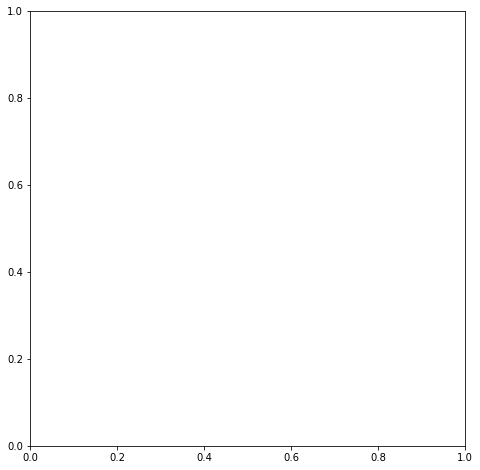

In [10]:
%pylab
%matplotlib inline

img = imread("./Data/N2DH-GOWT1/img/t01.tif")
figure(figsize=(15,8))
imshow(img, "gray")

In [11]:
%pylab
%matplotlib inline

gt_N2DH-GOWT1 = imread("./Data/N2DH-GOWT1/gt/man_seg01.tif")
figure(figsize=(15,8))
imshow(gt, "gray")

SyntaxError: cannot assign to operator (<ipython-input-11-2d3188d25d4b>, line 4)

In [12]:
#using otsu thresholding on a single image
otsu_threshold = otsu_faster(img)
otsu_threshold  

NameError: name 'otsu_faster' is not defined

In [13]:
# dice score
dice_score_faster(clipped, gt_N2DH-GOWT1)

NameError: name 'dice_score_faster' is not defined

In [51]:
# IoU
IoU(clipped,gt_N2DH-GOWT1)


0.07139965198215116